In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv("/content/Final.csv")

In [ ]:
df.head(5)

,lat,long,temp,prep,Cl,F,Mg,Na,Ca,K,NO3,TH,PH,EC,Co32,HCO3,SO4
0,27.069396,77.884274,32.084719,1.589838,1917.0,0.86,298.0,1125.0,164.0,19.0,39.0,1650.0,7.62,9048.0,0,458.0,921.0
1,26.870478,78.497285,32.571662,1.802417,1704.0,0.78,70.0,109.0,60.0,3.0,108.0,440.0,7.64,8194.0,0,445.0,29.0
2,27.175255,78.009816,32.297902,1.807007,170.0,0.51,53.0,281.0,48.0,4.6,0.0,340.0,7.83,1426.0,0,366.0,232.0
3,27.176529,77.914653,32.084719,1.807007,156.0,0.66,113.0,449.0,68.0,6.7,0.0,640.0,7.89,1725.0,0,537.0,747.0
4,27.233637,78.198136,32.297902,2.144400,320.0,0.54,53.0,1064.0,80.0,5.6,0.0,420.0,7.76,2946.0,0,439.0,1312.0


In [ ]:
arr = [1910,0.39,290,1110,150,15,40,1650,7.62,9000,0,450,921]

In [ ]:
df.dtypes

lat     float64
long    float64
temp    float64
prep    float64
Cl      float64
F       float64
Mg      float64
Na      float64
Ca      float64
K       float64
NO3     float64
TH      float64
PH      float64
EC      float64
Co32      int64
HCO3    float64
SO4     float64
dtype: object

In [ ]:
def wqi_value(arr):
  #p=[cl,f,mg,na,ca,k,no3,th,ph,ec,co32,hco3,so4]
  l=[2,4,2,1,2,2,3,2,2,1,0,3,3]
  wqi =0
  relative_weights =[0 for i in l]
  rating = [0 for i in l]
  standard =[250,1,30,200,75,12,45,300,7,300,1,250,200]   #co32- standard is 1 defined but it will not impact the value as its weight is 0
  for i in range(len(l)):
    if i==8:
      relative_weights[i] = l[i]/sum(l)
      if 6.5<=arr[i]<=8.5:
        rating[i]=100
      else:
        rating[i] = (arr[i]/7)*100
    else:
      relative_weights[i] = l[i]/sum(l)
      rating[i] = (arr[i]/standard[i])*100
    wqi = wqi + relative_weights[i]*rating[i]
  if wqi<50:
    return 1 #excellent for drinking
  elif 100>=wqi>=50:
    return 2 #good water quality
  elif 200>=wqi>100:
    return 3 #poor water quality
  elif 300>=wqi>200:
    return 4 #very poor water quality
  elif wqi>300:
    return 5 #unfit for drinking




In [ ]:
last_13_columns = df.iloc[:, -13:]


In [ ]:
last_13_columns

,Cl,F,Mg,Na,Ca,K,NO3,TH,PH,EC,Co32,HCO3,SO4
0,1917.0,0.86,298.00,1125.00,164.0,19.00,39.00,1650.0,7.62,9048.0,0,458.0,921.00
1,1704.0,0.78,70.00,109.00,60.0,3.00,108.00,440.0,7.64,8194.0,0,445.0,29.00
2,170.0,0.51,53.00,281.00,48.0,4.60,0.00,340.0,7.83,1426.0,0,366.0,232.00
3,156.0,0.66,113.00,449.00,68.0,6.70,0.00,640.0,7.89,1725.0,0,537.0,747.00
4,320.0,0.54,53.00,1064.00,80.0,5.60,0.00,420.0,7.76,2946.0,0,439.0,1312.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4336,163.3,0.02,59.54,28.65,24.0,31.56,45.32,305.0,7.86,1287.0,0,341.6,75.15
4337,42.6,0.00,31.59,34.87,28.0,2.86,0.25,200.0,8.10,546.0,0,237.9,16.06
4338,35.5,0.00,37.67,17.44,20.0,3.75,0.00,205.0,8.00,480.0,0,219.6,4.30
4339,42.6,0.00,54.68,31.25,12.0,8.16,0.00,255.0,7.93,654.0,0,268.4,28.61


In [ ]:
results = last_13_columns.apply(wqi_value)

In [ ]:
df['WQI'] = df.apply(lambda row: wqi_value(row[-13:]), axis=1)

In [ ]:
grouped_df = df.groupby("WQI")

In [ ]:
grouped_df.size()

WQI
1     997
2    1698
3    1049
4     335
5     262
dtype: int64

In [ ]:
df.describe()

In [ ]:
df.corr()

In [ ]:
def wawqi(arr):
  standard =[250,1,30,200,75,12,45,300,7,300,250,200] #exclude Co32-
  #p=[cl,f,mg,na,ca,k,no3,th,ph,ec,hco3,so4]
  l=[ 0 for i in range(len(standard))]
  p=0
  for i in standard:
    p=p+(1/i)
  k = 1/p
  weights=[0 for i in standard]
  wqi=0
  for i in range(len(standard)):
    weights[i] = k/(standard[i])
  for i in range(len(standard)):
    wqi = wqi + weights[i]*(100*(arr[i]/standard[i]))

  if wqi<=25:
    return 1 #excellent for drinking
  elif 50>=wqi>25:
    return 2 #good water quality
  elif 75>=wqi>50:
    return 3 #poor water quality
  elif 100>=wqi>75:
    return 4 #very poor water quality
  elif wqi>100:
    return 5 #unsafe to drink


In [ ]:
arr = [1910,0,290,1110,150,15,40,1650,7.62,9000,450,921]

9000

In [ ]:
df.drop('WAWQI',axis=1,inplace=
        True)

In [ ]:
df

In [ ]:
new_df = df.drop('Co32', axis=1)
new_df= new_df.drop("WQI",axis=1)


In [ ]:
new_df

,lat,long,temp,prep,Cl,F,Mg,Na,Ca,K,NO3,TH,PH,EC,HCO3,SO4
0,27.069396,77.884274,32.084719,1.589838,1917.0,0.86,298.00,1125.00,164.0,19.00,39.00,1650.0,7.62,9048.0,458.0,921.00
1,26.870478,78.497285,32.571662,1.802417,1704.0,0.78,70.00,109.00,60.0,3.00,108.00,440.0,7.64,8194.0,445.0,29.00
2,27.175255,78.009816,32.297902,1.807007,170.0,0.51,53.00,281.00,48.0,4.60,0.00,340.0,7.83,1426.0,366.0,232.00
3,27.176529,77.914653,32.084719,1.807007,156.0,0.66,113.00,449.00,68.0,6.70,0.00,640.0,7.89,1725.0,537.0,747.00
4,27.233637,78.198136,32.297902,2.144400,320.0,0.54,53.00,1064.00,80.0,5.60,0.00,420.0,7.76,2946.0,439.0,1312.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4336,26.221342,85.120750,30.631902,4.826680,163.3,0.02,59.54,28.65,24.0,31.56,45.32,305.0,7.86,1287.0,341.6,75.15
4337,26.217293,85.639862,30.631902,5.273571,42.6,0.00,31.59,34.87,28.0,2.86,0.25,200.0,8.10,546.0,237.9,16.06
4338,26.142754,85.659419,30.631902,5.273571,35.5,0.00,37.67,17.44,20.0,3.75,0.00,205.0,8.00,480.0,219.6,4.30
4339,26.164923,85.493229,30.631902,4.733576,42.6,0.00,54.68,31.25,12.0,8.16,0.00,255.0,7.93,654.0,268.4,28.61


In [ ]:
wawqi(arr)

3

In [ ]:
df['WAWQI'] = new_df.apply(lambda row: wawqi(row[-12:]), axis=1)


In [ ]:
grouped_df = df.groupby("WAWQI")
grouped_df.size()

WAWQI
1     557
2    1152
3     946
4     607
5    1079
dtype: int64

In [ ]:
df.isna().sum()

lat      0
long     0
temp     0
prep     0
Cl       0
F        0
Mg       0
Na       0
Ca       0
K        0
NO3      0
TH       0
PH       0
EC       0
Co32     0
HCO3     0
SO4      0
WQI      0
WAWQI    0
dtype: int64

In [ ]:
df.to_csv("Final_WQI_WAWQI")

In [ ]:
import pandas as pd
df = pd.read_csv("Final.csv")

In [ ]:
df.head()

,lat,long,temp,prep,Cl,F,Mg,Na,Ca,K,NO3,TH,PH,EC,Co32,HCO3,SO4
0,27.069396,77.884274,32.084719,1.589838,1917.0,0.86,298.0,1125.0,164.0,19.0,39.0,1650.0,7.62,9048.0,0,458.0,921.0
1,26.870478,78.497285,32.571662,1.802417,1704.0,0.78,70.0,109.0,60.0,3.0,108.0,440.0,7.64,8194.0,0,445.0,29.0
2,27.175255,78.009816,32.297902,1.807007,170.0,0.51,53.0,281.0,48.0,4.6,0.0,340.0,7.83,1426.0,0,366.0,232.0
3,27.176529,77.914653,32.084719,1.807007,156.0,0.66,113.0,449.0,68.0,6.7,0.0,640.0,7.89,1725.0,0,537.0,747.0
4,27.233637,78.198136,32.297902,2.144400,320.0,0.54,53.0,1064.0,80.0,5.6,0.0,420.0,7.76,2946.0,0,439.0,1312.0


In [ ]:
df["SAR"] = (df["Na"])/((df["Na"]+df["Ca"])/2)**0.5

In [ ]:
df["%Na"] =((df["Na"]+df["K"])/(df["Na"]+df["Ca"]+df["Mg"]+df["K"]))*100

In [ ]:
df.head()

,lat,long,temp,prep,Cl,F,Mg,Na,Ca,K,NO3,TH,PH,EC,Co32,HCO3,SO4,IWQI_Sum,SAR,%Na
0,27.069396,77.884274,32.084719,1.589838,1917.0,0.86,298.0,1125.0,164.0,19.0,39.0,1650.0,7.62,9048.0,0,458.0,921.0,6.756985,44.314011,71.232877
1,26.870478,78.497285,32.571662,1.802417,1704.0,0.78,70.0,109.0,60.0,3.0,108.0,440.0,7.64,8194.0,0,445.0,29.0,6.761486,11.857637,46.280992
2,27.175255,78.009816,32.297902,1.807007,170.0,0.51,53.0,281.0,48.0,4.6,0.0,340.0,7.83,1426.0,0,366.0,232.0,15.203963,21.909041,73.874806
3,27.176529,77.914653,32.084719,1.807007,156.0,0.66,113.0,449.0,68.0,6.7,0.0,640.0,7.89,1725.0,0,537.0,747.0,15.842421,27.926472,71.572169
4,27.233637,78.198136,32.297902,2.144400,320.0,0.54,53.0,1064.0,80.0,5.6,0.0,420.0,7.76,2946.0,0,439.0,1312.0,0.000000,44.488075,88.940629


In [ ]:
max(df["SAR"])

111.85772784611181

In [ ]:
def iwqi_sar(sar):
  final = 0
  if sar<3:
    final = 100 - ((sar)*15/3)
  elif 3<sar<=6:
    final = 85 - ((sar-3)*25/3)
  elif 6<sar<=12:
    final = 60 - ((sar-6)*25/6)
  else:
    final = 35 - ((sar-12)*35/(111.85-12)) # 111.85 is max of sar
  return 0.189*final



In [ ]:
def iwqi_ec(ec):
  final = 0
  if 200<ec<=750:
    final = 100 - ((ec-200)*15/550)
  elif 750<ec<=1500:
    final = 85 - ((ec-750)*25/750)
  elif 1500<ec<=3000:
    final = 60 - ((ec-1500)*25/1500)
  elif ec>3000:
    final = 35 - ((ec-3000)*35/(37230-3000)) # 37230 is max of ec
  elif ec<=200:
    final = 35- ((ec-200)*35/(200))
  return 0.211*final

In [ ]:
# for conversion of na,cl,hco3   from mg/l to meq/l   =>   meq/l = (mg/l)*valence/(AW)

# fir na valence = 1 and AW = 22.99 and
# for cl valence = 1 and AW = 35.45
# for hco3 valence = 1 and AW = 61.02

In [ ]:
def iwqi_na(na):
  na = na*1/(22.99)
  final = 0
  if 2<na<=3:
    final = 100 - ((na-2)*15/1)
  elif 3<na<=6:
    final = 85 - ((na-3)*25/3)
  elif 6<na<=9:
    final = 60 - ((na-6)*25/3)
  elif na>9:
    final = 35 - ((na-9)*35/(37230-9)) # 37230 is max of na
  elif na<=2:
    final = 35- ((na)*35/(2))
  return 0.204*final


In [ ]:
def iwqi_cl(cl):
  cl = cl*1/(35.45)
  ficll = 0
  if cl<=4:
    ficll = 100 - ((cl)*15/4)
  elif 4<cl<=7:
    ficll = 85 - ((cl-4)*25/3)
  elif 10<cl<=7:
    ficll = 60 - ((cl-7)*25/3)
  elif cl>10:
    ficll = 35 - ((cl-10)*35/(9075-10)) # 9075 is max of cl
  return 0.194*ficll

In [ ]:
def iwqi_hco3(hco3):
  hco3 = hco3*1/(61.02)
  fihco3l = 0
  if 1<hco3<=1.5:
    fihco3l = 100 - ((hco3-1)*15/0.5)
  elif 1.5<hco3<=4.5:
    fihco3l = 85 - ((hco3-1.5)*25/3)
  elif 4.5<hco3<=8.5:
    fihco3l = 60 - ((hco3-4.5)*25/4)
  elif hco3>8.5:
    fihco3l = 35 - ((hco3-9)*35/(8449-8.5)) # 37230 is max of hco3
  elif hco3<=2:
    fihco3l = 35- ((hco3)*35/(2))
  return 0.202*fihco3l

In [ ]:
df["IWQI_Sum"] = 0

In [ ]:
df['IWQI_Sum']  =df.loc[:, 'Cl'].apply(iwqi_cl) + df.loc[:, 'SAR'].apply(iwqi_sar) +df.loc[:, 'EC'].apply(iwqi_ec) +df.loc[:, 'Na'].apply(iwqi_na) +df.loc[:, 'HCO3'].apply(iwqi_hco3)

In [ ]:
def final_iwqi(su):
  if 85<su<100:
    return 1 #no toxicity, Groundwater can be used for all types of soil as low risk of soil salinity and sodicity is prevailed
  elif 70<su<=85:
    return 2 #avoid to use of salt sensitive
  elif 55<su<=70:
    return 3 #Groundwater can be used for light soil texture with high sand content, moderate to high permeability
  elif 40<su<55:
    return 4 # moderate to high salt tolerance plants, Groundwater can be used for permeable soil without compact layers and taking in consideration the high frequency of the irrigation schedule for irrigation water with EC > 2000 μS/cm and SAR>7
  elif su<40:
    return 5 #high salt tolerant plants only Groundwater can’t be used to irrigate soil under normal conditions

In [ ]:
df["IWQI"] = df.loc[:,'IWQI_Sum'].apply(final_iwqi)

In [ ]:
grouped_df = df.groupby("IWQI")
grouped_df.size()

IWQI
1       7
2    1428
3    1671
4     608
5     627
dtype: int64

In [ ]:
df.to_csv("Final_IWQI.csv")

In [ ]:
pip install imbalanced-learn


In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='auto', k_neighbors=5, random_state=42)


In [ ]:
import pandas as pd
df = pd.read_csv("/content/Final_IWQI.csv")

In [ ]:
df.shape

(4341, 22)

In [ ]:
y =df["IWQI"]

In [ ]:
X = df.drop("IWQI",axis=1)

In [ ]:
X_res, y_res = smote.fit_resample(X, y)


In [ ]:
X_res["IWQI"] = y_res

In [ ]:
grouped_df = df.groupby("IWQI")
grouped_df.size()

IWQI
1       7
2    1428
3    1671
4     608
5     627
dtype: int64

In [ ]:
X_res.to_csv("Final_IWQI_after_sampling.csv")

In [ ]:
import geopandas as gpd
import pandas as pd


In [ ]:
df

,Unnamed: 0,lat,long,temp,prep,Cl,F,Mg,Na,Ca,...,TH,PH,EC,Co32,HCO3,SO4,IWQI_Sum,SAR,%Na,IWQI
0,0,27.069396,77.884274,32.084719,1.589838,1917.0,0.86,298.00,1125.00,164.0,...,1650.0,7.62,9048.0,0,458.0,921.00,32.768966,44.314011,71.232877,5
1,1,26.870478,78.497285,32.571662,1.802417,1704.0,0.78,70.00,109.00,60.0,...,440.0,7.64,8194.0,0,445.0,29.00,42.727212,11.857637,46.280992,4
2,2,27.175255,78.009816,32.297902,1.807007,170.0,0.51,53.00,281.00,48.0,...,340.0,7.83,1426.0,0,366.0,232.00,51.711077,21.909041,73.874806,4
3,3,27.176529,77.914653,32.084719,1.807007,156.0,0.66,113.00,449.00,68.0,...,640.0,7.89,1725.0,0,537.0,747.00,47.479200,27.926472,71.572169,4
4,4,27.233637,78.198136,32.297902,2.144400,320.0,0.54,53.00,1064.00,80.0,...,420.0,7.76,2946.0,0,439.0,1312.00,27.888801,44.488075,88.940629,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4336,4336,26.221342,85.120750,30.631902,4.826680,163.3,0.02,59.54,28.65,24.0,...,305.0,7.86,1287.0,0,341.6,75.15,55.087566,5.583936,41.885217,3
4337,4337,26.217293,85.639862,30.631902,5.273571,42.6,0.00,31.59,34.87,28.0,...,200.0,8.10,546.0,0,237.9,16.06,63.659322,6.219353,38.769009,3
4338,4338,26.142754,85.659419,30.631902,5.273571,35.5,0.00,37.67,17.44,20.0,...,205.0,8.00,480.0,0,219.6,4.30,70.670475,4.030821,26.870403,2
4339,4339,26.164923,85.493229,30.631902,4.733576,42.6,0.00,54.68,31.25,12.0,...,255.0,7.93,654.0,0,268.4,28.61,62.364280,6.720042,37.147705,3


In [ ]:
import geopandas as gpd
import pandas as pd


In [ ]:
gdf = gpd.GeoDataFrame(
    df, geometry=gpd.points_from_xy(df.long, df.lat))


<ipython-input-15-71b7bf70a79b>:5: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


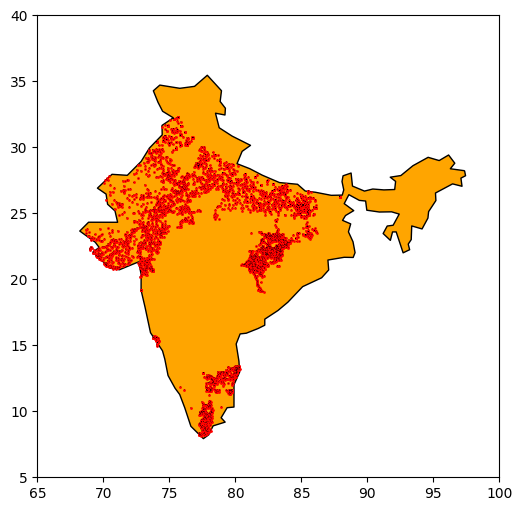

In [ ]:
import matplotlib.pyplot as plt
import geopandas as gpd

# create a world map with low resolution
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# filter the world geodataframe to only keep India
india = world.query("name == 'India'")

# plot the India geodataframe
ax = india.plot(color='orange', edgecolor='black', figsize=(10, 6))
gdf.plot(ax=ax, color='red', markersize=1)

# add labels to the geodataframe points
gdf.apply(lambda x: ax.annotate(text=x.IWQI, xy=x.geometry.coords[0],
                                ha='center', color='black', fontsize=1), axis=1)

# adjust the axis limits to zoom in on India
ax.set_xlim(65, 100)
ax.set_ylim(5, 40)

# show the map
plt.show()



In [ ]:
import pandas as pd
df = pd.read_csv("/content/Final_IWQI.csv")

In [ ]:
df.head()